# モデルの複雑度とモデルの正確度
- 過大適合:モデルが複雑すぎて学習データに最適化しすぎて一般化しにくい。
- 過小適合:モデルが単純すぎて学習データを十分に分析できない。
- 過大適合と過小適合の折衝点を踏まえ、モデルの一般化の性能を最大化させることのできるモデルを生成する。


---
## 指導学習
- 結果値に対するラベルが存在し、入力データを通じて出力データがどのようなラベルかを分類する予測を行う。

- 分類基準
    - 二進分類 : 結果値についたラベルが二つの種類(Y/N、Female/Male、Success/Failなど)
    - 多範疇分類 : nつの範疇からなる結果値を分類

### 1) 意思決定木(Decision Tree)
- 意思決定の規則を図表化し、関心の集団をいくつかの小集団に分類し、予測する計量的な分析方法
- 意思決定の木のモデル学習方法
- Entropyまたはジニ係数を通じて最適な特徴値を選定し、最上位ノードから分類基準に適用する。
- 繰り返しノードを生成して分類する。
- これ以上ノードを生成できないか、指定した高さ(depth)に達すると分類を終了する。
    - node:分類基準となる特定の変数と値
    - root node : 最初の分類基準となる最上位ノード
    - leaf node:最上位ノードと最後の最終ノードの間に存在する中間ノード
    - leaf:最後の最終ノード
    - edge: ノードの分類結果(T/F)と次のノードを連結
    - depth:最終ノードが生成されるまでの段階


- 数字型結果を返還する回帰ツリー(Regression Tree)と範疇型結果を返還する分類ツリー(Classification Tree)
- 直観的な作動方式で解析力が非常に良い分類モデルと評価
- 複数の変数に対してそれぞれの重要度を評価することができる。
- 入力データに対して範疇型データと数字型データの両方を適用できるが範疇型データの場合ラベルのエンコードを適用
    - sklearn.preprocessing > labelEnconder
- 結果値について二進分類と多範主義分類の両方が可能である。


- 過適合(Over-fitting)管理が必要
    - 学習したデータと異なる新しいデータに対して一般化する性能が落ち、過適合傾向が大きいのが意思決定木の最大の弱点
    - dedepthが大きすぎると過適合傾向が高い。
        - clfset_param (max_depth=n)
    - 新しいnodeが生成される時に使用されるsampleの本数が小さすぎると過適合傾向が高い。
        - min_samples_split, min_samples_leaf
    - 次元(使われる変数)が多すぎると過適合傾向が高い。
        - max_features, PCA


- 情報獲得 (Information Gain) , 不純度 (Criterion) : Gini Index (基本値) , Entropy Index
    - 確率変数が含んでいる情報(範疇)がどれだけ混ざっているかを表す指標
    - 分類後の純度増加/不純度または不確実性の減少が最も大きい変数を優先的に分類基準に適用
    - 最終的に0になると均一な情報(範囲)で行われたデータ

In [4]:
# graphvizライブラリ
# conda install graphviz
# conda install python-graphviz
# graphviz環境変数の設定
import os

os.environ['PATH'] += os.pathsep + r'C:\Users\dltjs\Anaconda3\Library\bin\graphviz'

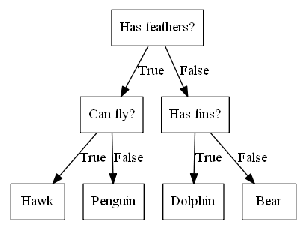

In [6]:
#意思決定の木の例
# prompt : pip install mglearn

import mglearn

mglearn.plots.plot_animal_tree()

In [7]:
from sklearn import datasets

iris = datasets.load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
# 独立(x、問題)、従属(y、正解)変数の分離
iris_x = iris.data
iris_y = iris.target

In [10]:
# 学習、評価データの分離/8:2
# 学習 : 生成したモデルを学習させるためのデータ
# 評価 : 学習させたモデルの性能を評価するためのデータ。
# 評価データは、最初の1回だけ使用する
# 一般的な割合:学習>評価、8:2、7.5:2.5、7:3
# train_test_split(x、y、test_size):返り値は4個、手順をよく記憶して書けば艦
# 複数の変数値に変数名入力 => 学習x, 評価x, 学習y, 評価y
from sklearn.model_selection import train_test_split

In [11]:
# 学習用問題、評価用問題、学習用正解、評価用正解を分けること
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.2)

In [12]:
iris_x.shape

(150, 4)

In [13]:
train_x.shape

(120, 4)

In [14]:
test_x.shape

(30, 4)

In [16]:
# Pythonのマシンラーニングパッケージ
from sklearn.tree import DecisionTreeClassifier

In [18]:
# decision treeのモデルオブジェクトを生成
# デフォルト値:枝打ちをしない最大深さのdecision tree
clf = DecisionTreeClassifier()

In [19]:
# モデル学習(学習用の問題と答え) : Scikit-learnの変数.fit()
clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
# モデルに問題を解かせる: Scikit-learn変数.predict()
train_pred = clf.predict(train_x)
train_pred

array([0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 0, 1, 0, 2])

In [21]:
# 学習データに対する確率値の返還
train_proba = clf.predict_proba(train_x)
train_proba

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [22]:
# 学習データに対する分類結果に対する精度計算
# 学習データに対する正確度が100であったり、評価データでの正確度と差が大き過ぎると、過適合だ。
clf.score(train_x, train_y)

1.0

In [23]:
# テスト問題に対する正解を .predict() で予測させる
test_answer = clf.predict(test_x)
test_answer

array([2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2,
       2, 1, 1, 0, 2, 2, 2, 0])

In [24]:
# テスト問題に対する確率値を.predict_proba()で予測させる。
test_proba = clf.predict_proba(test_x)
test_proba

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [25]:
# テスト問題に対する正答率を.score()で確認。
clf.score(test_x, test_y)

0.9666666666666667

In [26]:
# ユーザが直接irisデータと似たデータを作って入れても予測する
clf.predict([[5.7, 2.1, 6.4, 5.5]])

array([2])

## 意思決定の木モデル、結果の視覚化

In [27]:
# graphvizライブラリを使用
# treeライブラリの使用
import graphviz
from sklearn import tree

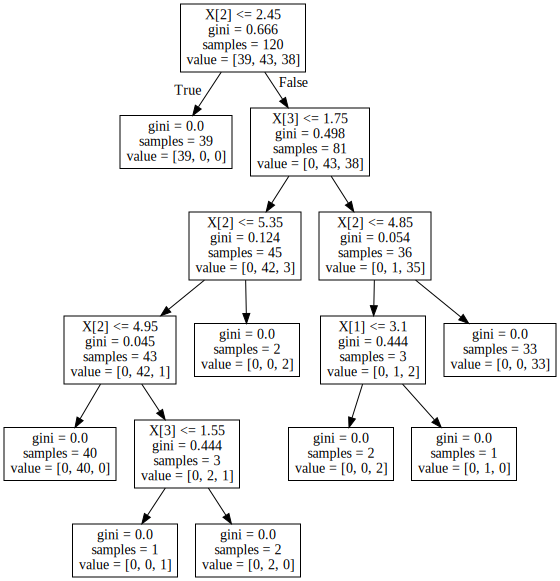

In [28]:
# 視覚化のイメージ処理
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [30]:
# オプションの追加1-分類基準として使用された示性値をColumn名で変える.
# パラメータにfeature_names=featuresを追加
features = iris.feature_names

In [31]:
# オプション追加2-結果値をデータ属性(品種の名前)と変える。
# パラメータにclass_names=speciesを追加
species = iris.target_names

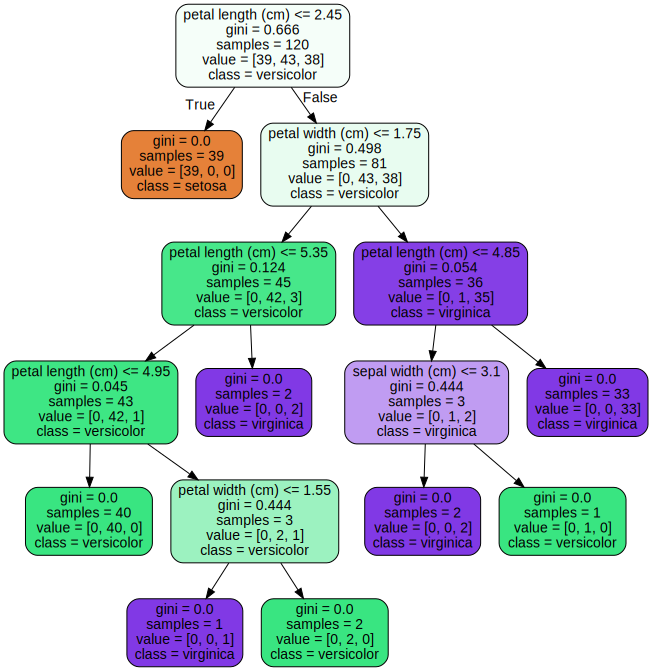

In [32]:
# オプション追加3-ボックスの色を満たすため&ボックスの角の丸くしている。
# export_graphviz(filled, rounded)
dot_data = tree.export_graphviz(clf, feature_names=features, class_names=species,
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [33]:
# 結果物をpdfファイルに保存する
graph.render('iris_img')

'iris_img.pdf'

## 変数の重要度抽出

In [34]:
# 使用された変数(特性)について重要度抽出
# model.feature_importrances_
print(iris.feature_names)
clf.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.        , 0.01669101, 0.55600374, 0.42730525])

In [35]:
#モデルが使用した独立変数の個数
n_features = clf.n_features_

# index
idx = range(clf.n_features_)
print(n_features, idx)

4 range(0, 4)


In [36]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x2bdc10598d0>,
 <a list of 4 Text yticklabel objects>)

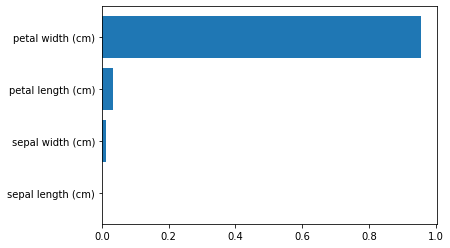

In [40]:
# feature_importance_ 視覚化
# barh - plot

plt.barh(idx, clf.feature_importances_) 
plt.yticks(idx, iris.feature_names) # 'feature_names': ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [37]:
# (練習問題)前に生成した最大深さの意思決定木のモデルと結果を比較
# 深く3に変えたモデルとの正確度算出。
# 1.モデルオブジェクト生成=>最大深さを3に設定
clf2 = DecisionTreeClassifier(max_depth=3)

In [39]:
# 学習させる
clf2.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
# 評価する
clf.score(test_x, test_y)

0.9666666666666667

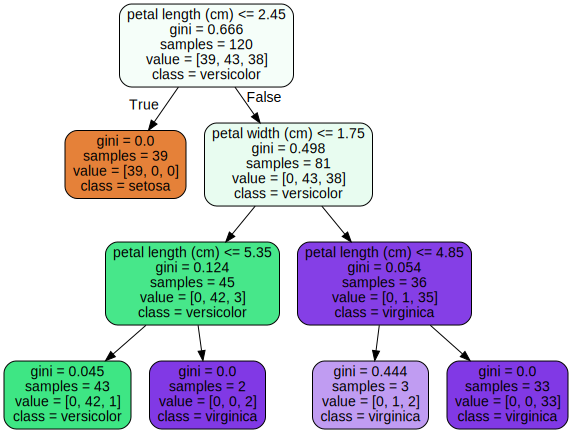

In [41]:
#重要度算出と視覚化
dot_data = tree.export_graphviz(clf2, feature_names=features, class_names=species, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [42]:
clf.feature_importances_

array([0.        , 0.01669101, 0.55600374, 0.42730525])

### 2) Random Forest

- Ensemble method(アンサンブル技法)の一種類で,多くの意思決定の木でできている指導学習モデル.
- それぞれの意思決定の木で使われる特徴値を無作為に選定.
- 複数の意思決定木の平均予測値を使用して分類することで、単一意思決定木の弱点である過適合を補完する.
- データの特徴値に対する解釈と洞察が得にくい.

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# 変数生成
rfc = RandomForestClassifier()

In [45]:
# モデル学習
rfc.fit(train_x, train_y)

C:\Users\dltjs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# 学習用入力データに対する結果値を予測
train_pred = rfc.predict(train_x)
train_pred

array([0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 0, 1, 0, 2])

In [52]:
#学習データに対する分類結果の精度を計算
rfc.score(train_x, train_y)

0.9916666666666667

In [53]:
# テストデータに対する分類結果の精度を計算
rfc.score(test_x, test_y)

0.9666666666666667

In [49]:
# forestで構成された個別のDecision Tree
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=385574618, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1224437847, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [54]:
# feautre_inportances_
rfc.feature_importances_

array([0.10748045, 0.02943439, 0.47392612, 0.38915905])

### 3) k-Nearest Neighbors

- 予測しようとするデータに対して距離(類似性)が最も近いデータ(隣人)を探して予測に使うアルゴリズム。
- 二つ以上のデータ(隣人)を選ぶ時、データが多いクラスを基準に最終隣人を選ぶ。
- 理解するのがとても簡単で、媒介変数に対する複雑な調整なしに簡単に良い性能を発揮する。
- 学習データの大きさが大きすぎると(変数の数、データの数など)処理速度が遅くなる。
- データを構成する値段がほとんど0の場合は、あまり動作しない。
- データ間の距離を測定する際、値の範囲(単位)が異なる場合、範囲が小さいデータに影響を大きく受けるため、単位を統一させる正規化の過程が必要である。
- 主要媒介変数
    - metirc&p:データ間の距離を測定する方式、デフォルト値=minkowski&2=euclidian(さまざまな環境でよく動作して一般的に使用される。)
    - n_neighbors: 隣の本数
- 決定境界(decision boundary)
    - クラス同士の領域を区分する境界。
    - (n_neighbors) の数が増えるほどスムーズな結晶境界を生成 => 単純なモデルを意味する。
    - 隣人数が小さいとモデルの複雑度が増す。
    - モデルの複雑度が高くなるほど学習データに対する精度は高まるが、新しいデータに一般化する性能は低くなる傾向がある。
    - 隣人数を増加させれば、学習データに大学の精度は下がってもテストデータに対する精度が向上し、安定的な予測値が得られる。
    - 近所の数が多いからといって、無条件にテストデータに対する精度が高いわけではない。

In [55]:
import mglearn

C:\Users\dltjs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


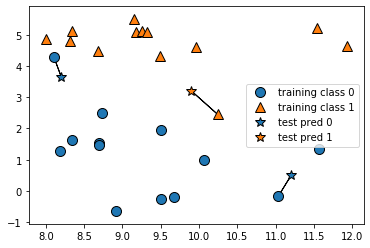

In [56]:
# KNN例題のイメージ
# n_neighbors=1:最も近い1つのデータを隣人として選択、群集化
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\dltjs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


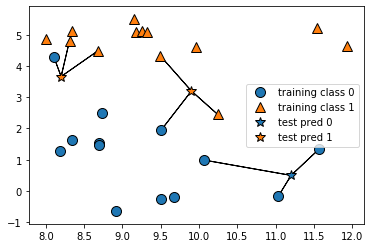

In [57]:
# KNN例題のイメージ
# n_neighbors=3:最も近い3つのデータを隣人として選択、群集化
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [58]:
# 学習およびテストデータの生成
from sklearn import datasets
from sklearn.model_selection import train_test_split

# irisデータセット load
iris = datasets.load_iris()
# data->問題(x), target->正解(y)
iris_x = iris.data
iris_y = iris.target

# 得られたiris_x, iris_yをtrain_test_splitで学習、試験データ分類すること。 8:2の割合
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.2)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# KNN変数の生成
knn = KNeighborsClassifier(n_neighbors=3)

In [61]:
#モデル学習
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
#学習用入力データに対する結果予測
knn_predict = knn.predict(train_x)
knn_predict

array([1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 0])

In [63]:
#学習データに対する精度の計算
knn.score(train_x, train_y)

0.975

In [64]:
# テストデータに対する結果値
knn_predict = knn.predict(test_x)
knn_predict

array([2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 0, 0, 1, 2, 2])

In [65]:
#テストデータに対する精度計算
knn.score(test_x, test_y)

0.9666666666666667

In [66]:
knn.predict([[201.4, 300.5, 600.2, 100.1]])

array([2])